# The Spark Foundations and GRIP Task

# Author: Diksha Babhulkar

<big>
Task 5:  Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’
    
● As a sports analysts, find out the most successful teams, players and factors 
contributing win or loss of a team. 
    
● Suggest teams or players a company should endorse for its products. 
</big>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df=pd.read_csv('matches.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
dev=pd.read_csv('deliveries.csv')
dev.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
print(df.shape)

(756, 18)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

### date type is in object format let's chage it to datetime format

In [7]:
df['date']=pd.to_datetime(df['date'])

In [8]:
df.dtypes

id                          int64
season                      int64
city                       object
date               datetime64[ns]
team1                      object
team2                      object
toss_winner                object
toss_decision              object
result                     object
dl_applied                  int64
winner                     object
win_by_runs                 int64
win_by_wickets              int64
player_of_match            object
venue                      object
umpire1                    object
umpire2                    object
umpire3                    object
dtype: object

In [9]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [10]:
df.nunique()

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

In [11]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

#### we can drop umpire3 column it has all values as nan or null

In [12]:
df.drop(columns='umpire3',inplace=True)

In [13]:
df.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
dtype: int64

In [14]:
df[df.isnull().any(axis=1)]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak


#### We can fill all the city nan values with Dubai as their venu is Dubai international cricket stadium

In [15]:
df.city.fillna('Dubai',inplace=True)

#### Let's fill the nan values of umpire1 and umpire2 with anonymous

In [16]:
df.umpire1.fillna('Anonymous',inplace=True)
df.umpire2.fillna('Anonymous',inplace=True)

In [17]:
df.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            0
umpire2            0
dtype: int64

In [18]:
df[df.isnull().any(axis=1)]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
744,11340,2019,Bengaluru,2019-04-30,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


<big>We can see that there are no 'winners' and 'players of the matches' as 'result' has 'no result', it means match maybe cancelled due to rain.

So, we will fill all Nan values with 'Match Cancelled' in this case</big>

In [19]:
df.winner.fillna('Match Cancelled',inplace=True)
df.player_of_match.fillna('Match Cancelled',inplace=True)

# Exploratory Data Analysis - Matches Dataset

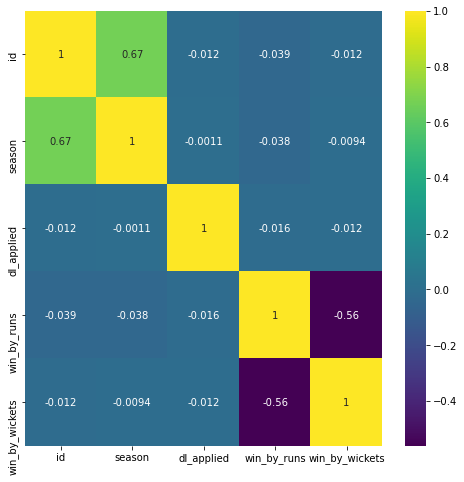

In [130]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

### Team won by maximum runs

In [20]:
df.iloc[df['win_by_runs'].idxmax()]

id                                  44
season                            2017
city                             Delhi
date               2017-05-06 00:00:00
team1                   Mumbai Indians
team2                 Delhi Daredevils
toss_winner           Delhi Daredevils
toss_decision                    field
result                          normal
dl_applied                           0
winner                  Mumbai Indians
win_by_runs                        146
win_by_wickets                       0
player_of_match            LMP Simmons
venue                 Feroz Shah Kotla
umpire1                    Nitin Menon
umpire2                      CK Nandan
Name: 43, dtype: object

### Team won by minimum runs

In [21]:
df.iloc[df['win_by_runs'].idxmin()]

id                                                       2
season                                                2017
city                                                  Pune
date                                   2017-04-06 00:00:00
team1                                       Mumbai Indians
team2                               Rising Pune Supergiant
toss_winner                         Rising Pune Supergiant
toss_decision                                        field
result                                              normal
dl_applied                                               0
winner                              Rising Pune Supergiant
win_by_runs                                              0
win_by_wickets                                           7
player_of_match                                  SPD Smith
venue              Maharashtra Cricket Association Stadium
umpire1                                     A Nand Kishore
umpire2                                             S Ra

In [22]:
df['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cape Town           7
Abu Dhabi           7
Dubai               7
Cuttack             7
Ranchi              7
Port Elizabeth      7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Kimberley           3
East London         3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

In [23]:
df.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali', 'Bengaluru'], dtype=object)

In [24]:
df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [25]:
df['season'].value_counts()

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

In [26]:
df['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [27]:
x=df['result'].value_counts().tolist()
x

[743, 9, 4]

In [28]:
a=df['result'].unique().tolist()
a

['normal', 'tie', 'no result']

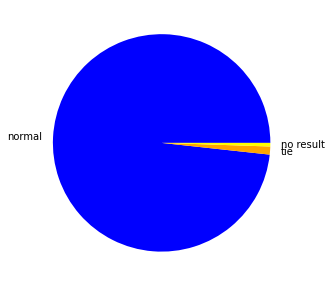

In [29]:
plt.figure(figsize=(5,5))
labels=a
data=x
colors=['blue','orange','yellow']
plt.pie(x,labels=labels,colors=colors)
plt.show()

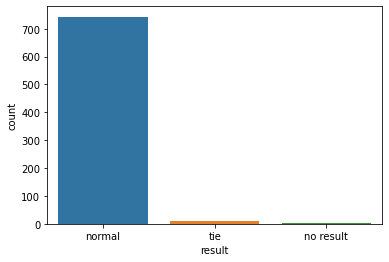

In [30]:
sns.countplot(x=df['result'])
plt.show()

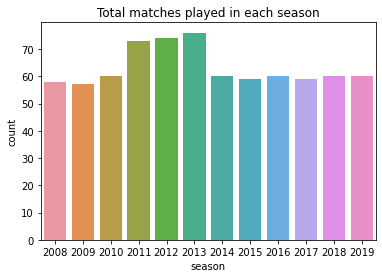

In [31]:
sns.countplot(x=df['season'])
plt.title('Total matches played in each season')
plt.show()

## The count of matches played at each stadium

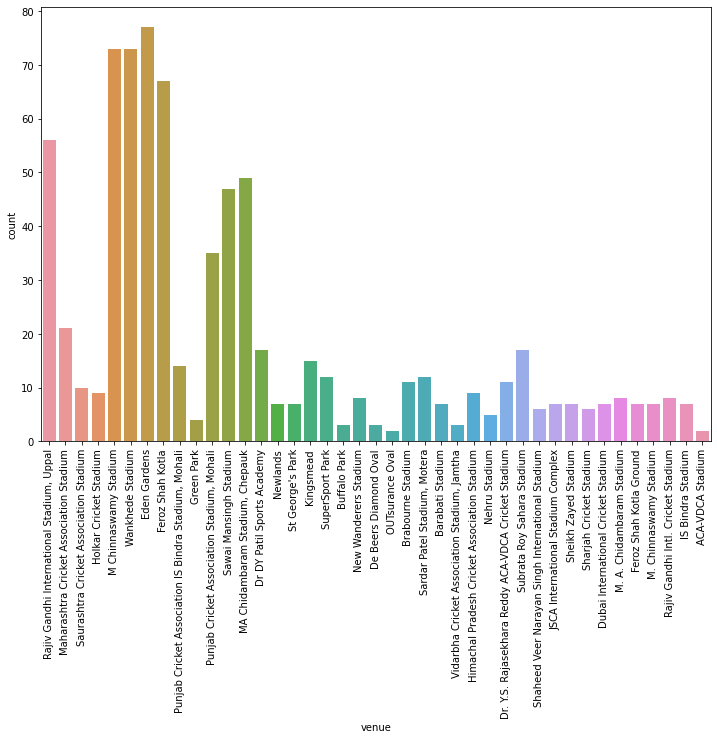

In [32]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['venue'])
plt.xticks(rotation=90)
plt.show()

### Teams with more number of wins

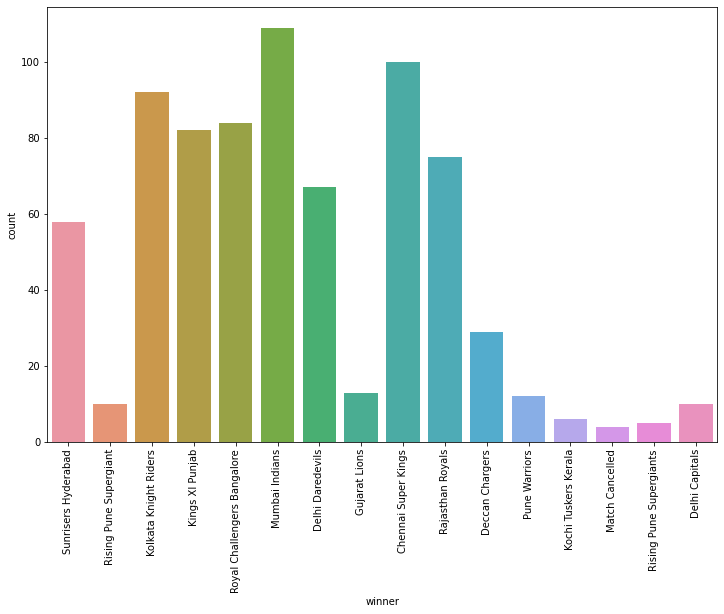

In [33]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['winner'])
plt.xticks(rotation=90)
plt.show()

## From above graph we can see that mumbai indians has won more number of matches.

## Teams with most number of toss wins

In [34]:
win=df['toss_winner'].value_counts()
win

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

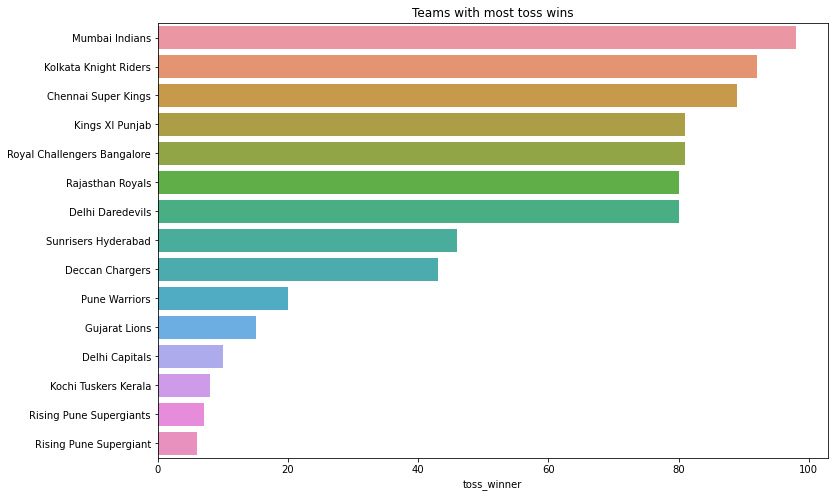

In [35]:
plt.figure(figsize=(12,8))
sns.barplot(x=win,y=win.index,orient='h')
plt.title('Teams with most toss wins')
plt.show()

### As we can see that from above graph is that mumbai indians has won more number of toss.

## Top 10  player performer of match

In [36]:
df['player_of_match'].value_counts()[:10]

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
Name: player_of_match, dtype: int64

## Bar plot for top 10 players of the match

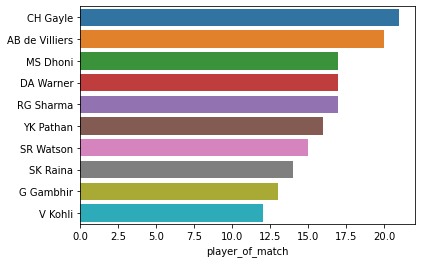

In [37]:
data=df['player_of_match'].value_counts()[:10]
sns.barplot(x=data,y=data.index,orient='h')
plt.show()

## CH Gayle is the most Successful player in all match winners

In [38]:
df['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

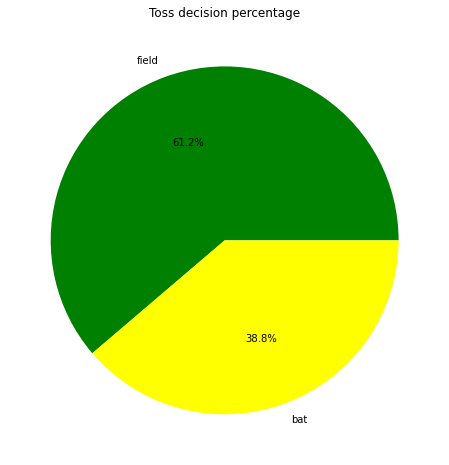

In [39]:
plt.subplots(figsize=(12,8))
toss = df.toss_decision.value_counts()
labels = (np.array(toss.index))
sizes = (np.array((toss / toss.sum())*100))
colors = ['green', 'yellow']
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%')
plt.title("Toss decision percentage")
plt.show()

### Number of times a team has  won the match after winning the match

In [40]:
np.sum(df['toss_winner']==df['winner'])

393

### Toss decision made in each season

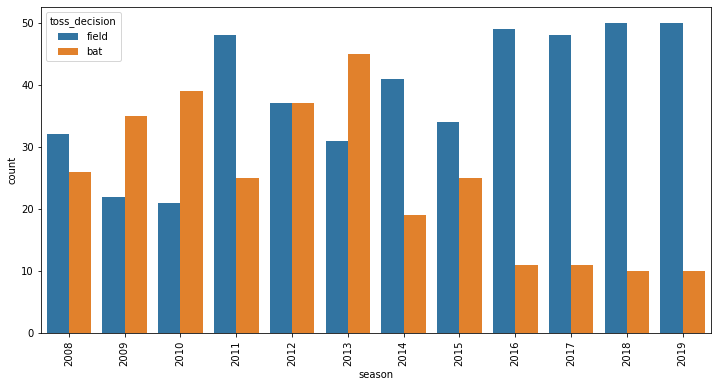

In [41]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=df)
plt.xticks(rotation=90)
plt.show()

### Teams win batting first

In [42]:
bat_first=df[df['win_by_runs']!=0]

In [43]:
bat_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,Anonymous,Anonymous
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon


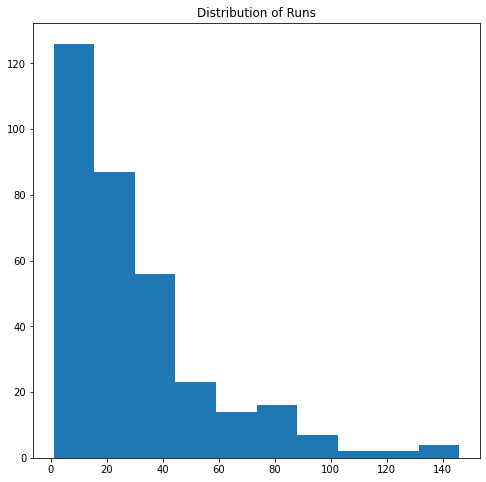

In [44]:
plt.figure(figsize=(8,8))
plt.hist(bat_first['win_by_runs'])
plt.title('Distribution of Runs')
plt.show()

In [45]:
#Finding out the number of wins each teams after batting first
bat_first['winner'].value_counts()

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Rising Pune Supergiants         2
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

### Top 5 teams with most wins after batting first

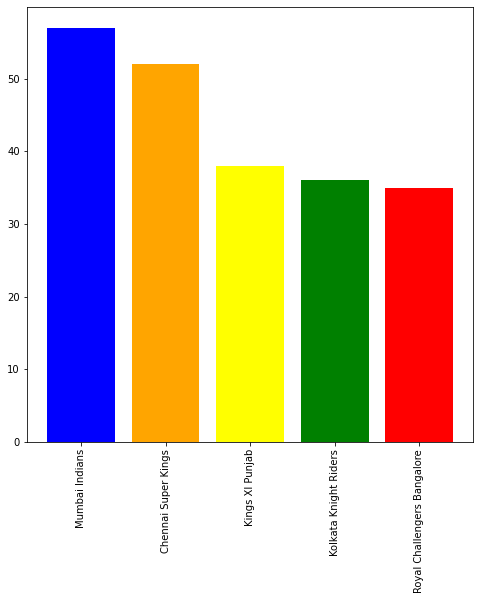

In [46]:
plt.figure(figsize=(8,8))
plt.bar(list(bat_first['winner'].value_counts()[0:5].keys()),list(bat_first['winner'].value_counts()[0:5]),
        color=['blue','orange','yellow','green','red'])
plt.xticks(rotation=90)
plt.show()

### Wining Percent of Batting first

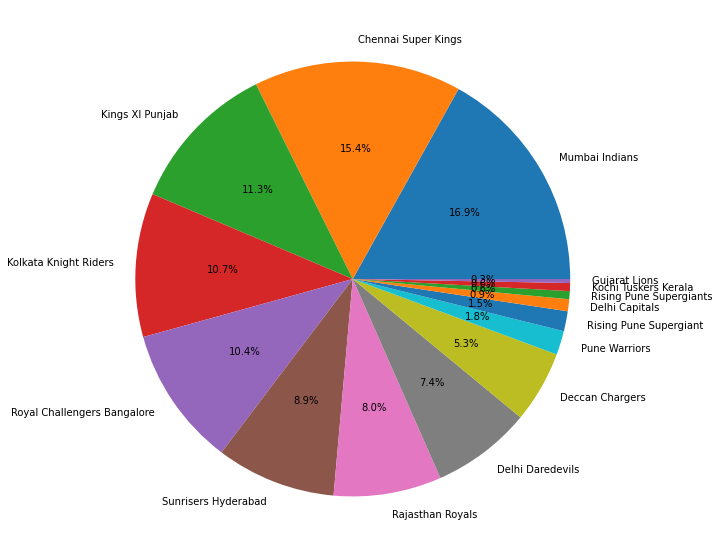

In [47]:
plt.figure(figsize=(10,10))
plt.pie(list(bat_first['winner'].value_counts()),labels=list(bat_first['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

### Teams win batting second

In [48]:
bat_second=df[df['win_by_wickets']!=0]

In [49]:
bat_second.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan


### Frequency of wins by wickets

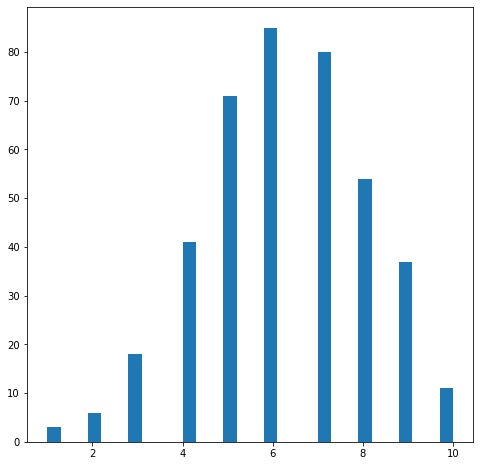

In [50]:
plt.figure(figsize=(8,8))
plt.hist(bat_second['win_by_wickets'],bins=30)
plt.show()

In [51]:
bat_second['winner'].value_counts()

Kolkata Knight Riders          56
Mumbai Indians                 50
Chennai Super Kings            48
Royal Challengers Bangalore    48
Rajasthan Royals               46
Kings XI Punjab                42
Delhi Daredevils               42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Delhi Capitals                  6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

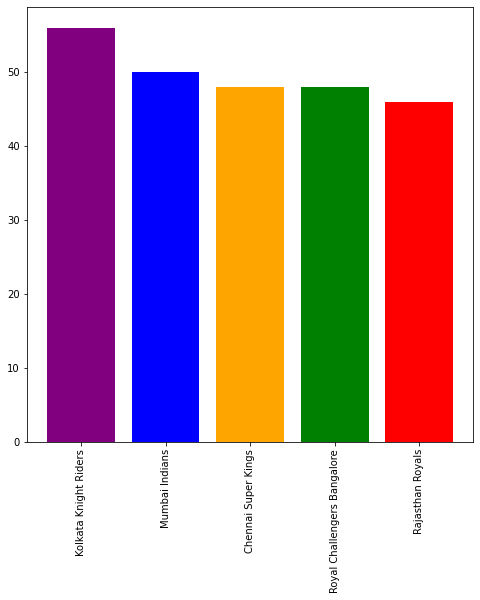

In [52]:
plt.figure(figsize=(8,8))
plt.bar(list(bat_second['winner'].value_counts()[0:5].keys()),list(bat_second['winner'].value_counts()[0:5]),
        color=['purple','blue','orange','green','red'])
plt.xticks(rotation=90)
plt.show()

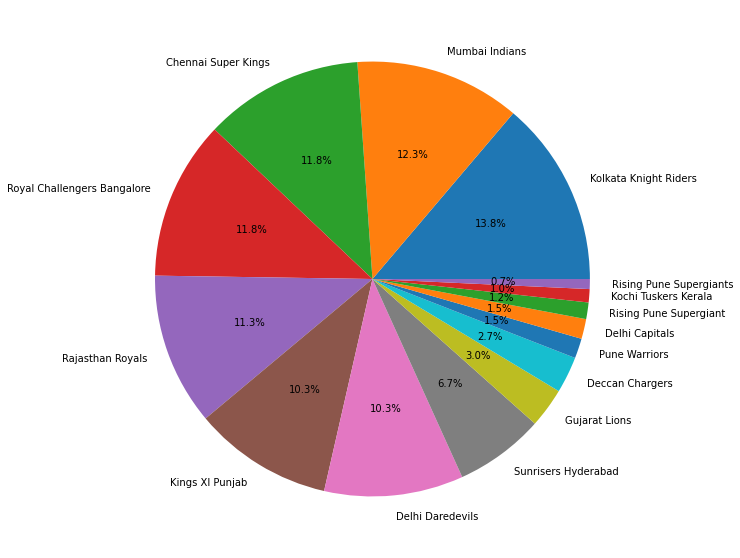

In [53]:
plt.figure(figsize=(10,10))
plt.pie(list(bat_second['winner'].value_counts()),labels=list(bat_second['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

### Season with  Most number of matches

In [56]:
seasons=df.groupby('season')[['id']].count()
seasons=seasons.sort_values('season',ascending=False).reset_index()
seasons.rename(columns={'id':'Matches','season':'Year'},inplace=True)

In [57]:
seasons

,Year,Matches
0,2019,60
1,2018,60
2,2017,59
3,2016,60
4,2015,59
5,2014,60
6,2013,76
7,2012,74
8,2011,73
9,2010,60


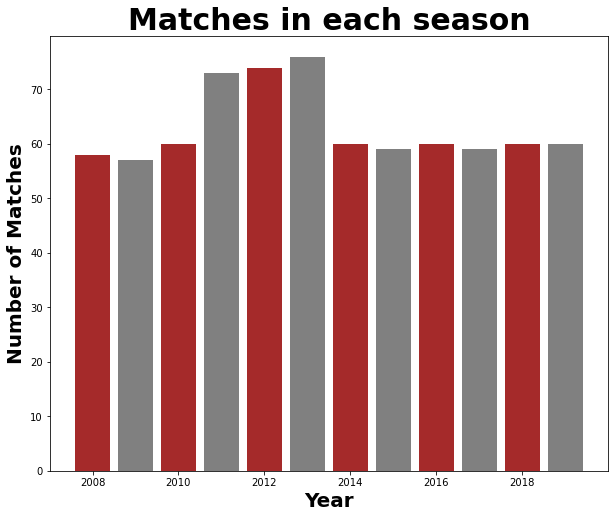

In [61]:
plt.figure(figsize=(10,8))
plt.title('Matches in each season',fontweight='bold',fontsize=30)
plt.bar(seasons.Year,seasons.Matches,color=['grey','brown'])
plt.xlabel('Year',fontweight='bold',fontsize=20)
plt.ylabel('Number of Matches',fontweight='bold',fontsize=20)
plt.show()

## Umpires

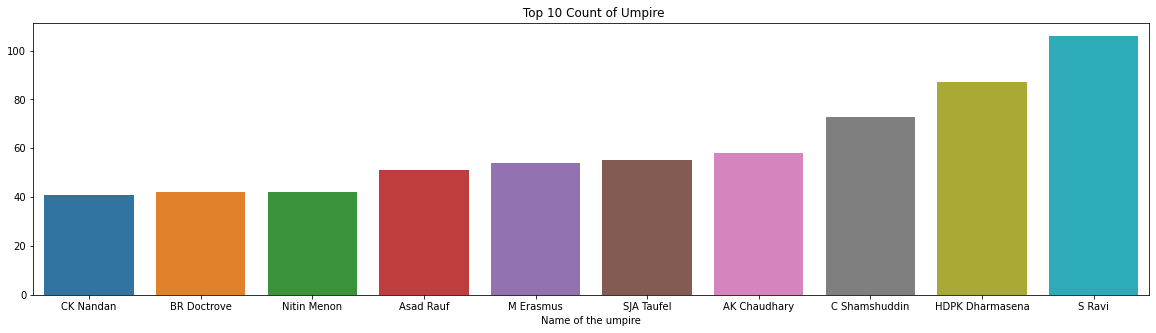

In [62]:
temp=pd.concat([df['umpire1'],df['umpire2']]).value_counts()[0:10].sort_values(ascending=True)
plt.figure(figsize=(20,5))
umpire=sns.barplot(x=temp.index,y=temp.values)
plt.title(' Top 10 Count of Umpire')
plt.xlabel('Name of the umpire')
plt.show()

# Deliveries Dataset

In [63]:
dev=pd.read_csv('deliveries.csv')
dev.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [64]:
dev.shape

(179078, 21)

In [65]:
dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [66]:
dev.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [67]:
dev.nunique()

match_id            756
inning                5
batting_team         15
bowling_team         15
over                 20
ball                  9
batsman             516
non_striker         511
bowler              405
is_super_over         2
wide_runs             6
bye_runs              5
legbye_runs           6
noball_runs           5
penalty_runs          2
batsman_runs          8
extra_runs            7
total_runs           10
player_dismissed    487
dismissal_kind        9
fielder             499
dtype: int64

In [68]:
dev.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

<p>player_dismissed' 'dismissal_kind' and 'fielder' have so many Nan values, it means the player was not out for that particular ball.we can neglect them.</p>

# Exploratory Data Analysis - Deliveries Dataset

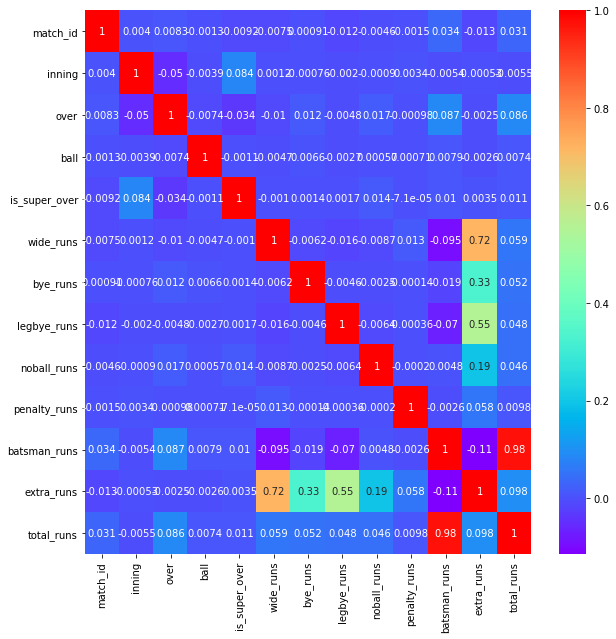

In [128]:
plt.figure(figsize=(10,10))
sns.heatmap(dev.corr(),annot=True,cmap='rainbow')
plt.show()

In [98]:
dev.iloc[dev['batsman_runs'].idxmax()]

match_id                             7898
inning                                  2
batting_team          Chennai Super Kings
bowling_team        Kolkata Knight Riders
over                                   20
ball                                    1
batsman                          DJ Bravo
non_striker                     RA Jadeja
bowler                      R Vinay Kumar
is_super_over                           0
wide_runs                               0
bye_runs                                0
legbye_runs                             0
noball_runs                             1
penalty_runs                            0
batsman_runs                            7
extra_runs                              1
total_runs                              8
player_dismissed                      NaN
dismissal_kind                        NaN
fielder                               NaN
Name: 151652, dtype: object

## Top 10 Batsman

In [69]:
bats=dev['batsman'].value_counts()[:10]
bats

V Kohli       4211
SK Raina      4044
RG Sharma     3816
S Dhawan      3776
G Gambhir     3524
RV Uthappa    3492
DA Warner     3398
MS Dhoni      3318
AM Rahane     3215
CH Gayle      3131
Name: batsman, dtype: int64

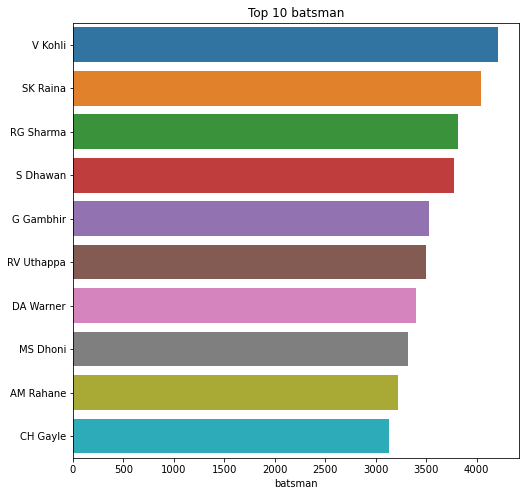

In [70]:
plt.figure(figsize=(8,8))
sns.barplot(x=bats,y=bats.index)
plt.title('Top 10 batsman')
plt.show()

### Top 10 bowlers

In [73]:
bowler=dev['bowler'].value_counts()[:10]
bowler

Harbhajan Singh    3451
A Mishra           3172
PP Chawla          3157
R Ashwin           3016
SL Malinga         2974
DJ Bravo           2711
B Kumar            2707
P Kumar            2637
UT Yadav           2605
SP Narine          2600
Name: bowler, dtype: int64

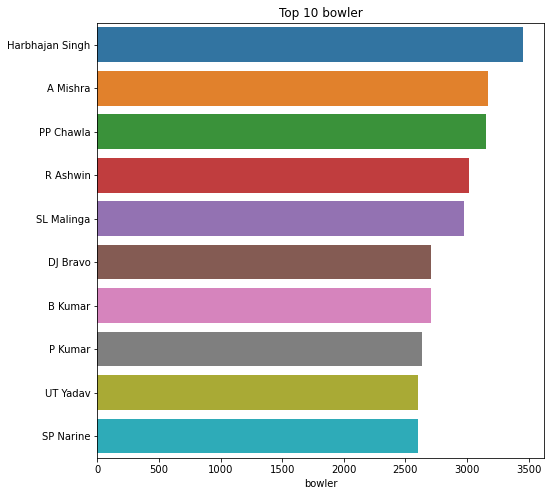

In [74]:
plt.figure(figsize=(8,8))
sns.barplot(x=bowler,y=bowler.index)
plt.title('Top 10 bowler')
plt.show()

<big>Harbhajan Singh is the the bowler with most number of balls bowled in IPL matches.</big>

### Bowler with most number of dot balls in IPL Matches

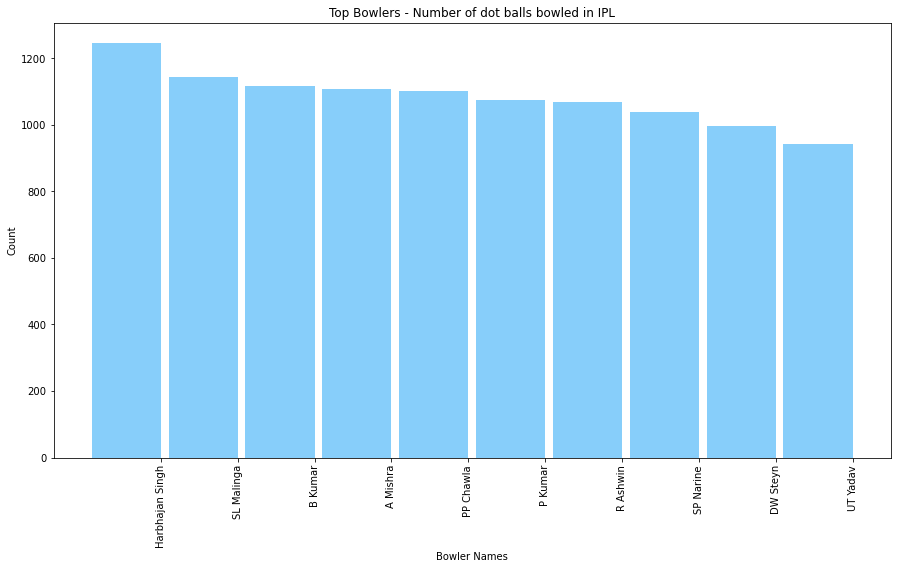

In [96]:
bowler_df = dev.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
bowler_df = bowler_df.iloc[:10,:]

labels = np.array(bowler_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(bowler_df['total_runs']), width=width, color='lightskyblue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of dot balls bowled in IPL")
ax.set_xlabel('Bowler Names')
plt.show()

In [86]:
x=dev.groupby('batsman').sum()['batsman_runs'].sort_values(ascending=False).head()
x

batsman
V Kohli      5434
SK Raina     5415
RG Sharma    4914
DA Warner    4741
S Dhawan     4632
Name: batsman_runs, dtype: int64

In [87]:
six=dev[dev['batsman_runs']==6]
c=six.groupby('batsman').count()['batsman_runs'].sort_values(ascending=False).head()
c

batsman
CH Gayle          327
AB de Villiers    214
MS Dhoni          207
SK Raina          195
RG Sharma         194
Name: batsman_runs, dtype: int64

### Top 5 batsman with most sixes in IPL Matches

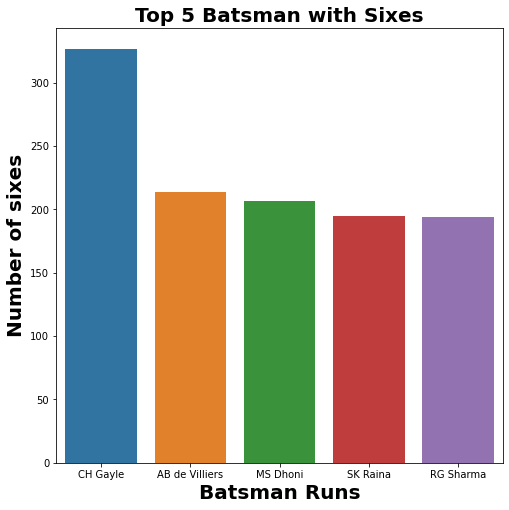

In [89]:
plt.figure(figsize=(8,8))
sns.barplot(x=c.index,y=c.values)
plt.title('Top 5 Batsman with Sixes',fontweight='bold',fontsize=20)
plt.xlabel('Batsman Runs',fontweight='bold',fontsize=20)
plt.ylabel('Number of sixes',fontweight='bold',fontsize=20)
plt.show()

### Batsman with most number of dot balls

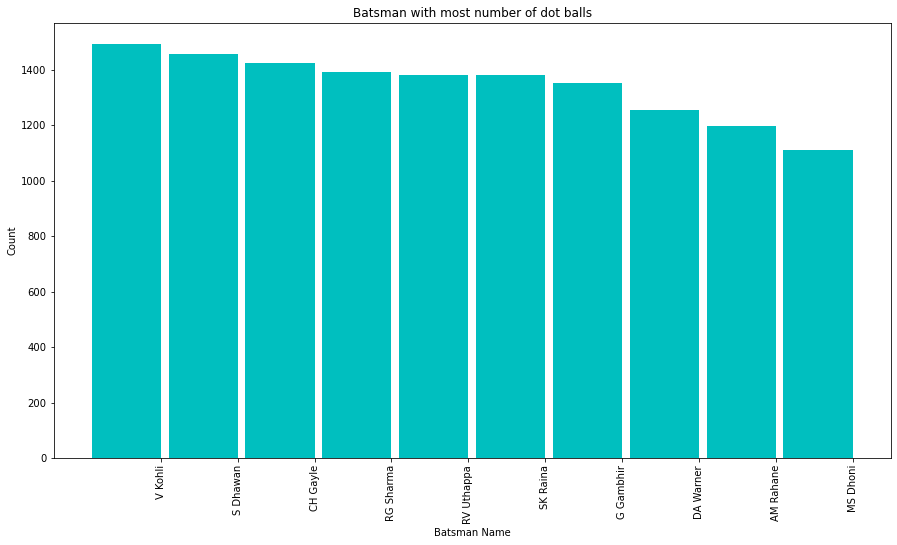

In [95]:
dot_df = dev.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
dot_df = dot_df.iloc[:10,:]

labels = np.array(dot_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(dot_df['batsman_runs']), width=width, color='c')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of dot balls")
ax.set_xlabel('Batsman Name')
plt.show()

### Top fielder including wicketkeepers

In [123]:
fielder=dev.groupby('fielder').apply(lambda x:x).dropna().reset_index()
fielder_list=fielder.groupby('fielder').count()
fielder_list=fielder_list['dismissal_kind'].reset_index(name='Dismissals')
fielder_max=fielder_list.sort_values(by='Dismissals',ascending=False)
top=fielder_max[:10]
fielder_list=fielder_list[:10]

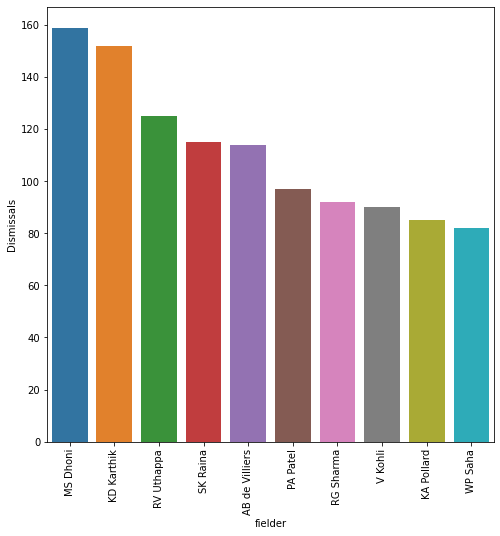

In [125]:
plt.figure(figsize=(8,8))
sns.barplot(x='fielder',y='Dismissals',data=top)
plt.xticks(rotation=90)
plt.show()

### Dismissal kind

In [107]:
kind=dev['dismissal_kind'].value_counts()
kind

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

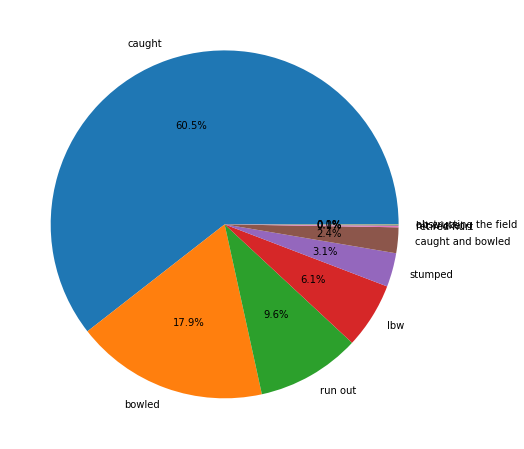

In [120]:
plt.figure(figsize=(10,8))
plt.pie(x=list(dev['dismissal_kind'].value_counts()),labels=list(dev['dismissal_kind'].value_counts().keys()),autopct='%0.1f%%')
plt.show()